In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
pre = './testFITS/'

In [62]:
from plotastrodata.analysis_utils import AstroData, AstroFrame
from plotastrodata.plot_utils import PlotAstroData as pad

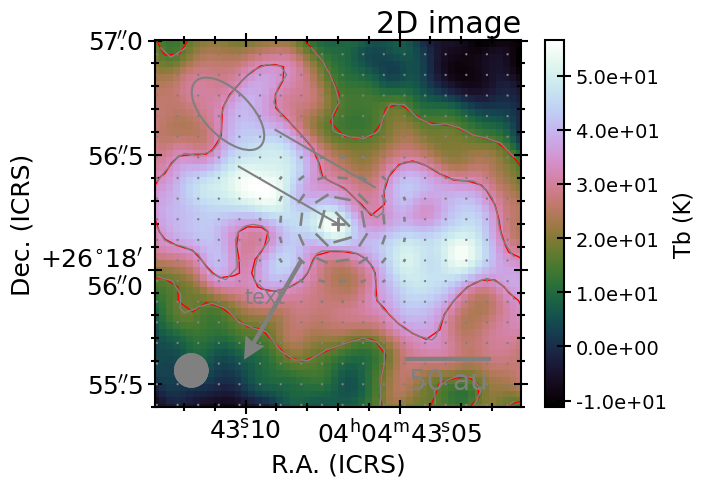

In [64]:
# 2D case
d = AstroData(fitsimage=pre+'test2D.fits', Tb=True, sigma=5e-3)
f = AstroFrame(rmax=0.8, center='B1950 04h01m40.57s +26d10m47.297s')
f.read(d)
p = pad(rmax=0.8, center='ICRS 04h04m43.07s 26d18m56.20s')
p.add_color(**d.todict(), cblabel='Tb (K)')
p.add_contour(fitsimage=pre+'test2D_2.fits', colors='r', sigma=5e-3)
p.add_contour(fitsimage=pre+'test2D.fits', xskip=2, yskip=2, sigma=5e-3)
p.add_segment(ampfits=pre+'test2Damp.fits',
              angfits=pre+'test2Dang.fits', xskip=3, yskip=3)
p.add_scalebar(length=50 / 140, label='50 au')
p.add_text([0.3, 0.3], slist='text')
p.add_marker('04h04m43.07s 26d18m56.20s')
p.add_line([[0.5, 0.5], [0.6, 0.6]], anglelist=[60, 60], rlist=[0.5, 0.5])
p.add_arrow([0.4, 0.4], anglelist=150, rlist=0.5)
p.add_region('ellipse', [0.2, 0.8], majlist=0.4, minlist=0.2, palist=45)
p.set_axis_radec(nticksminor=5, title={'label': '2D image', 'loc': 'right'})
p.savefig('test2D.png', show=True)

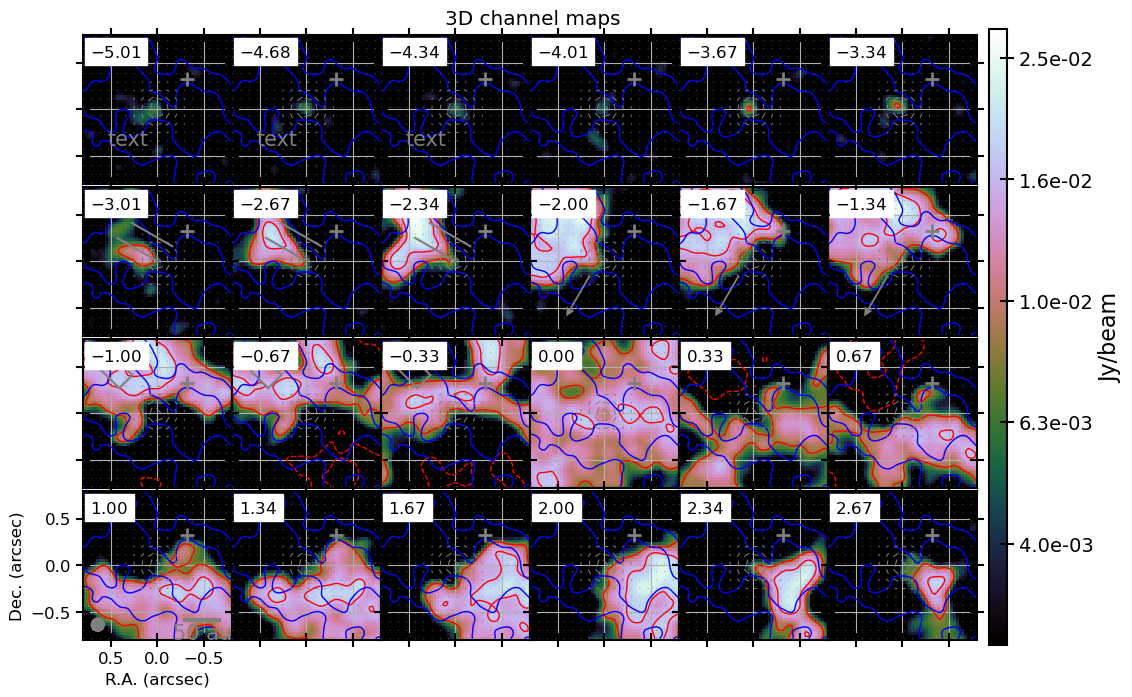

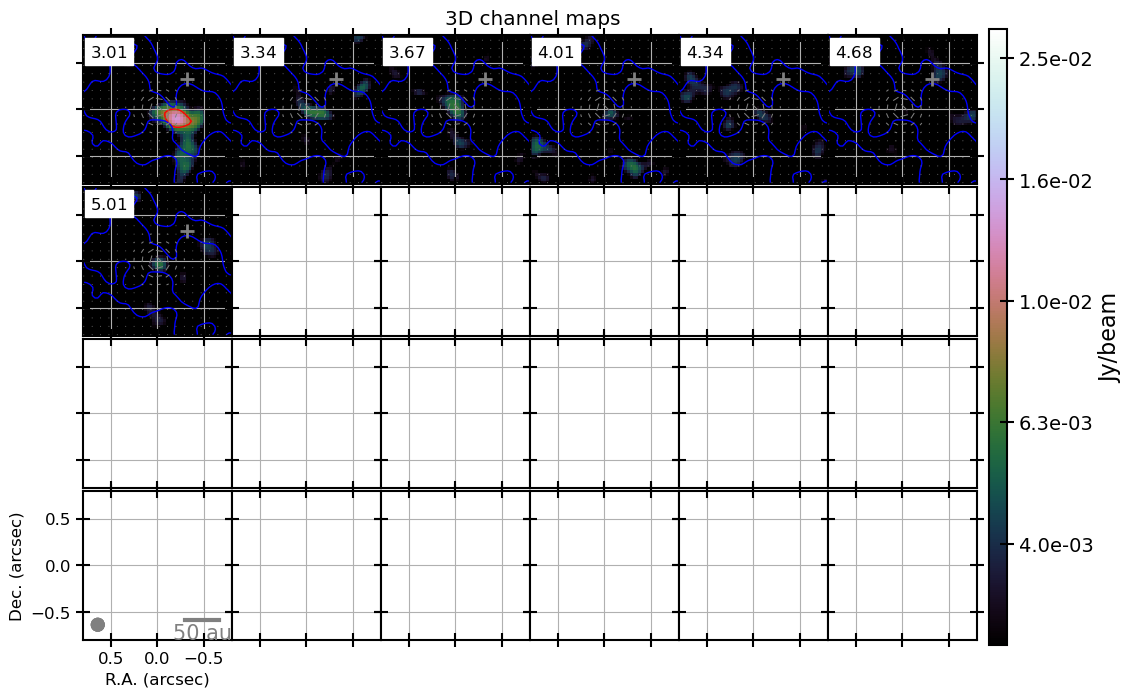

In [66]:
# 3D case
p = pad(rmax=0.8, fitsimage=pre+'test3D.fits', vmin=-5, vmax=5, vskip=2)
p.add_color(fitsimage=pre+'test3D.fits', stretch='log')
p.add_contour(fitsimage=pre+'test3D.fits', colors='r')
p.add_contour(fitsimage=pre+'test2D.fits', colors='b', sigma=5e-3)
p.add_segment(ampfits=pre+'test2Damp.fits',
              angfits=pre+'test2Dang.fits', xskip=3, yskip=3)
p.add_scalebar(length=50 / 140, label='50 au')
p.add_text([[0.3, 0.3]], slist=['text'], include_chan=[0, 1, 2])
p.add_marker([0.7, 0.7])
p.add_line([[0.5, 0.5], [0.6, 0.6]], anglelist=[60, 60], rlist=[0.5, 0.5],
           include_chan=[6, 7, 8])
p.add_arrow([[0.4, 0.4]], anglelist=[150], rlist=[0.5],
            include_chan=[9, 10, 11])
p.add_region('rectangle', [[0.2, 0.8]],
             majlist=[0.4], minlist=[0.2], palist=[45],
             include_chan=[12, 13, 14])
p.set_axis(grid={}, title='3D channel maps')
p.savefig('test3D.png', show=True)

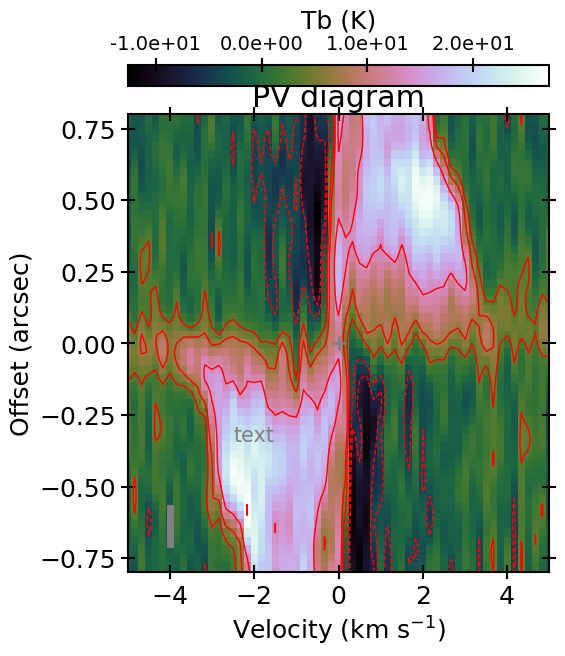

In [68]:
# PV case
p = pad(rmax=0.8, pv=True, swapxy=True, vmin=-5, vmax=5, figsize=(6, 7))
p.add_color(fitsimage=pre+'testPV.fits', Tb=True, cblabel='Tb (K)',
            cblocation='top', pvpa=60)
p.add_contour(fitsimage=pre+'testPV.fits', colors='r', sigma=1e-3, pvpa=60)
p.add_text([0.3, 0.3], slist='text')
p.add_marker([[0.5, 0.5]])
p.set_axis(title='PV diagram')
p.savefig('testPV.png', show=True)

pvpa is not specified. pvpa=bmaj is assumed.
pvpa is not specified. pvpa=bmaj is assumed.


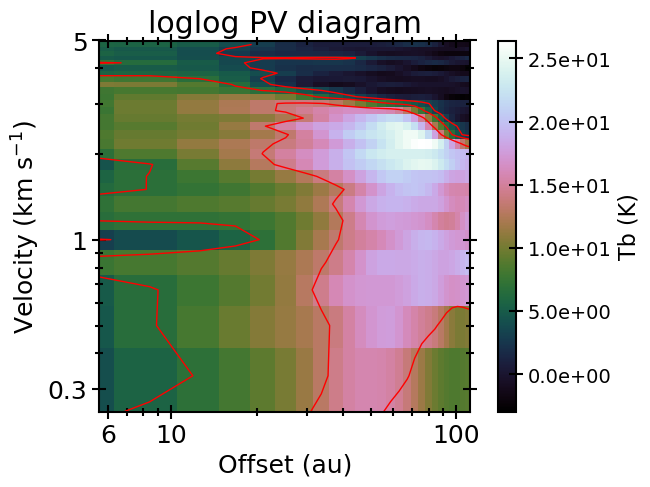

In [70]:
# log log PV case
p = pad(rmax=0.8 * 140, pv=True, quadrants='13', vmin=-5, vmax=5, dist=140)
p.add_color(fitsimage=pre+'testPV.fits', Tb=True, cblabel='Tb (K)', show_beam=False)
p.add_contour(fitsimage=pre+'testPV.fits', colors='r', sigma=1e-3, show_beam=False)
p.set_axis(title='loglog PV diagram', loglog=20)
p.savefig('testloglogPV.png', show=True)

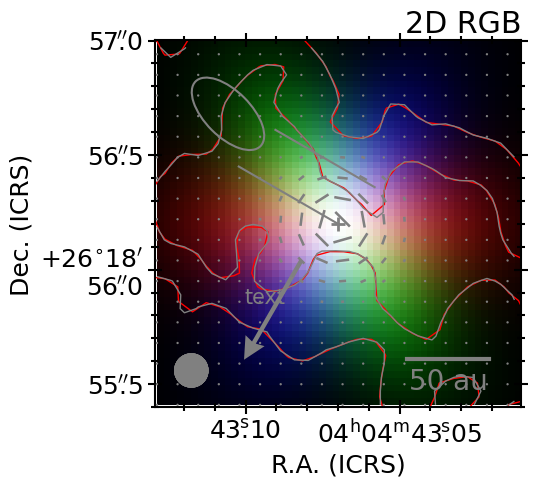

In [72]:
# RGB case
p = pad(rmax=0.8, center='04h04m43.07s 26d18m56.20s')
p.add_rgb(fitsimage=[pre+'test'+c+'.fits' for c in ['R', 'G', 'B']],
          sigma=[5e-3, 5e-3, 5e-3])
p.add_contour(fitsimage=pre+'test2D_2.fits', colors='r', sigma=5e-3)
p.add_contour(fitsimage=pre+'test2D.fits', xskip=2, yskip=2, sigma=5e-3)
p.add_segment(ampfits=pre+'test2Damp.fits',
              angfits=pre+'test2Dang.fits', xskip=3, yskip=3)
p.add_scalebar(length=50 / 140, label='50 au')
p.add_text([0.3, 0.3], slist='text')
p.add_marker('04h04m43.07s 26d18m56.20s')
p.add_line([[0.5, 0.5], [0.6, 0.6]], anglelist=[60, 60], rlist=[0.5, 0.5])
p.add_arrow([0.4, 0.4], anglelist=150, rlist=0.5)
p.add_region('ellipse', [0.2, 0.8], majlist=0.4, minlist=0.2, palist=45)
p.set_axis_radec(nticksminor=5, title={'label': '2D RGB', 'loc': 'right'})
p.savefig('test2Drgb.png', show=True)

Gauss (peak, center, FWHM): [0.02379747 1.72211966 2.02828083]
Gauss uncertainties: [0.00206394 0.08625904 0.20312666]
Gauss (peak, center, FWHM): [ 0.02595552 -1.77631339  1.69931276]
Gauss uncertainties: [0.00241524 0.07753803 0.18258811]


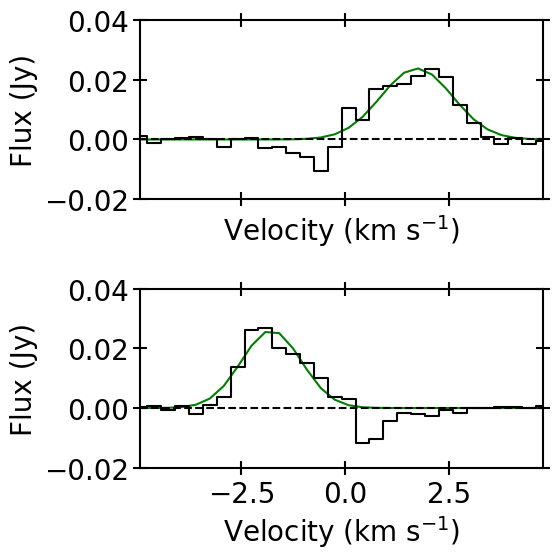

In [74]:
from plotastrodata.plot_utils import plotprofile

# Line profile
plotprofile(fitsimage=pre+'test3D.fits', ellipse=[[0.2, 0.2, 0]] * 2, flux=True,
            coords=['04h04m43.045s 26d18m55.766s', '04h04m43.109s 26d18m56.704s'],
            gaussfit=True, savefig='testprofile.png', show=True, width=2)

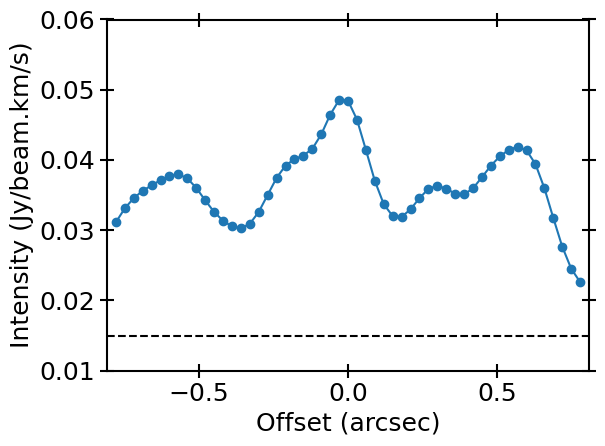

In [76]:
from plotastrodata.plot_utils import plotslice


# Spatial slice
plotslice(length=1.6, pa=270, fitsimage=pre+'test2D.fits',
          center='04h04m43.07s 26d18m56.20s', sigma=5e-3,
          savefig='testslice.png', show=True)

In [78]:
from plotastrodata.plot_utils import plot3d


# Rotatable 3D cube in html
plot3d(rmax=0.8, vmin=-5, vmax=5, fitsimage=pre+'test3D.fits',
       outname='test3D', levels=[3, 6, 9], show=False)

In [80]:
import matplotlib.animation as animation

In [82]:
# The following introduces a way for making an animation file of a given FITS cube.
nchans = 31

def update_plot(i):
    print(f'Channel number: {i:d}\033[1A')
    f = pad(rmax=0.8, fitsimage=pre+'test3D.fits', vmin=-5, vmax=5, vskip=2,
            channelnumber=i, fig=fig)
    f.add_color(fitsimage=pre+'test3D.fits', stretch='log')
    f.add_scalebar(length=50 / 140, label='50 au')
    f.set_axis_radec(grid={}, title='3D channel maps')
    f.fig.tight_layout()

fig = plt.figure()
ani = animation.FuncAnimation(fig, update_plot, frames=nchans, interval=50)
Writer = animation.writers['ffmpeg']  # for mp4
# Writer = animation.writers['pillow']  # for gif
writer = Writer(fps=10, bitrate=128)  # frame per second
ani.save('test_animation.mp4', writer=writer)
# ani.save('test_animation.gif', writer=writer)
plt.close()

Channel number: 0
Channel number: 0
Channel number: 1
Channel number: 2
Channel number: 3
Channel number: 4
Channel number: 5
Channel number: 6
Channel number: 7
Channel number: 8
Channel number: 9
Channel number: 10
Channel number: 11
Channel number: 12
Channel number: 13
Channel number: 14
Channel number: 15
Channel number: 16
Channel number: 17
Channel number: 18
Channel number: 19
Channel number: 20
Channel number: 21
Channel number: 22
Channel number: 23
Channel number: 24
Channel number: 25
Channel number: 26
Channel number: 27
Channel number: 28
Channel number: 29
Channel number: 30


In [84]:
from plotastrodata.los_utils import sys2obs, polarvel2losvel

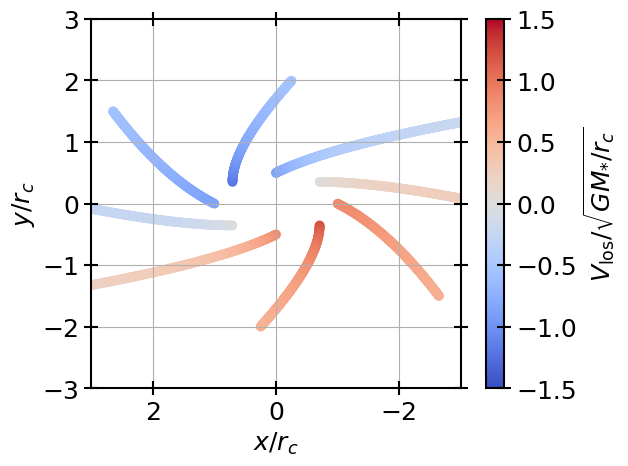

In [96]:
# The following introduces a way for plotting the projected morphology and the line-of-sight velocity of a streamer.
incl = 60
theta0 = 90

xscale = np.sin(np.radians(theta0))**2
vscale = 1 / np.sin(np.radians(theta0))

xsys = np.linspace(0, 3 / xscale, 200)
ysys = np.sqrt(2 * xsys + 1)
zsys = np.zeros_like(xsys)

r = np.hypot(xsys, ysys)
theta = np.zeros_like(r) + np.pi / 2
phi = np.arctan2(ysys, xsys)

v_r = -np.sqrt(1 / r * (2 - 1 / r))
v_theta = np.zeros_like(v_r)
v_phi = 1 / r

xsys = xsys * xscale
ysys = ysys * xscale
zsys = zsys * xscale

v_r = v_r * vscale
v_theta = v_theta * vscale
v_phi = v_phi * vscale

xlist, ylist, vlist = [], [], []
for phi0 in np.linspace(0, 360, 9):
    xobs, yobs, zobs = sys2obs(xsys=xsys, ysys=ysys, zsys=zsys,
                               incl=incl, phi0=phi0, theta0=theta0)
    vlos = polarvel2losvel(v_r=v_r, v_theta=v_theta, v_phi=v_phi,
                           theta=theta, phi=phi,
                           incl=incl, phi0=phi0, theta0=theta0)
    xlist.append(xobs)
    ylist.append(yobs)
    vlist.append(vlos)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
m = ax.scatter(xlist, ylist, c=vlist, cmap='coolwarm', vmin=-1.5, vmax=1.5)
fig.colorbar(m, ax=ax, label=r'$V_\mathrm{los} / \sqrt{GM_{*}/r_{c}}$')
ax.set_xlim(3, -3)
ax.set_ylim(-3, 3)
ax.set_aspect(1)
ax.set_xlabel(r'$x / r_{c}$')
ax.set_ylabel(r'$y / r_{c}$')
ax.grid()
fig.savefig('streamer.png')
plt.show()

In [98]:
from plotastrodata.fft_utils import fftcentering

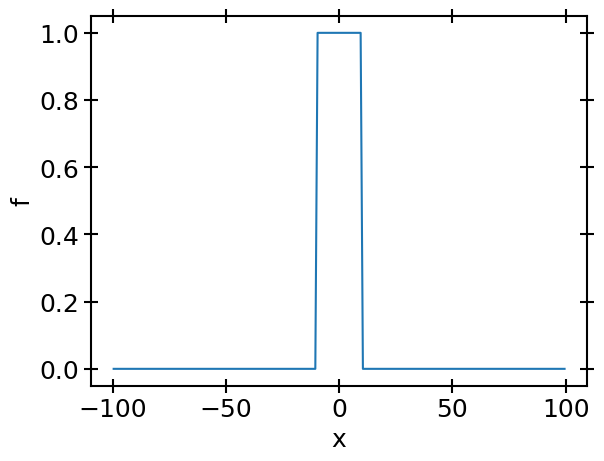

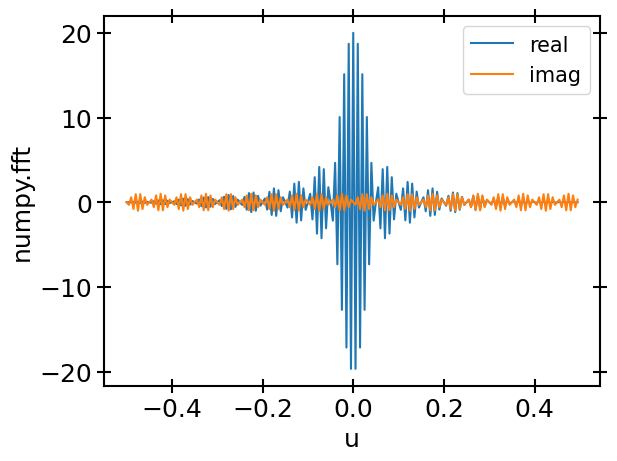

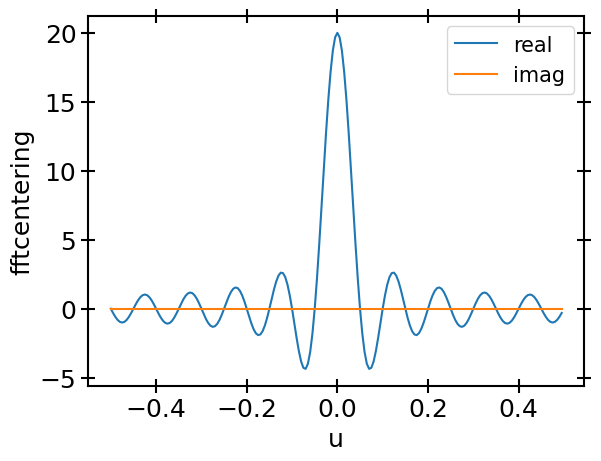

In [100]:
# Calculate the FFT of a boxcar function
x = np.linspace(-99.5, 99.5, 200)
f = np.where(np.abs(x)<10, 1, 0)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, f)
ax.set_xlabel('x')
ax.set_ylabel('f')
fig.savefig('boxcar.png')
plt.show()

u = np.fft.fftshift(np.fft.fftfreq(len(x), d=x[1] - x[0]))
F = np.fft.fftshift(np.fft.fft(f))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(u, np.real(F), label='real')
ax.plot(u, np.imag(F), label='imag')
ax.set_xlabel('u')
ax.set_ylabel('numpy.fft')
ax.legend()
fig.savefig('numpyfft.png')
plt.show()

F, u = fftcentering(f=f, x=x, xcenter=0)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(u, np.real(F), label='real')
ax.plot(u, np.imag(F), label='imag')
ax.set_xlabel('u')
ax.set_ylabel('fftcentering')
ax.legend()
fig.savefig('fftcentering.png')
plt.show()

In [102]:
from plotastrodata.fitting_utils import EmceeCorner
from plotastrodata.plot_utils import set_rcparams

set_rcparams(fontsize=12)

In [104]:
def logl(p):
    x1, x2, x3 = p
    chi2 = (x1 / 1)**2 + (x2 / 2)**2 + (x3 / 4)**2
    return -0.5 * chi2

In [106]:
# initialization
fitter = EmceeCorner(bounds=[[-5, 5], [-10, 10], [-20, 20]],
                     logl=logl, progressbar=False, percent=[16, 84])

best: [ 0.00909284  0.00802714 -0.02353292]
lower percentile: [-0.99020157 -2.01572481 -3.99606435]
50 percentile: [-0.00033289 -0.01956912  0.00232914]
higher percentile: [0.98903795 1.96904387 3.96221953]
evidence: 0.015543890789967376


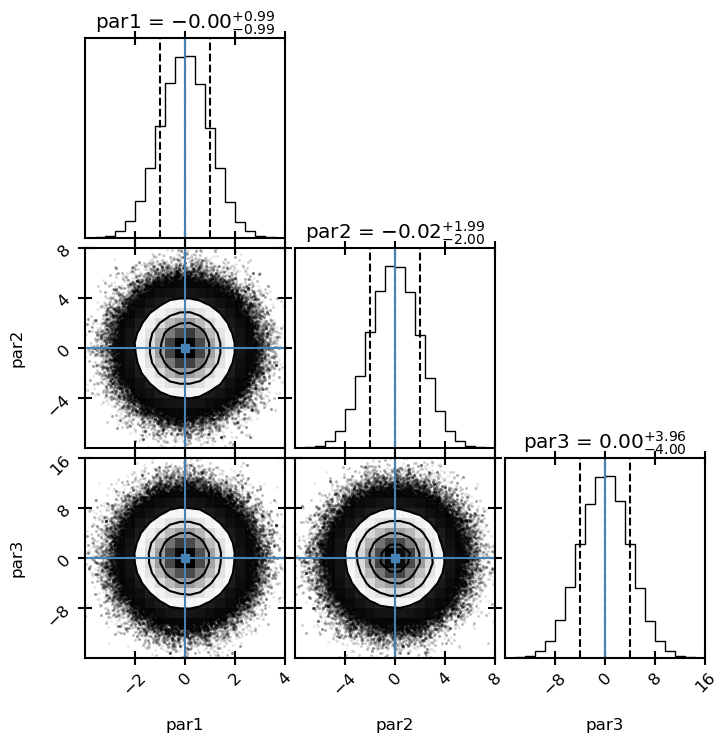

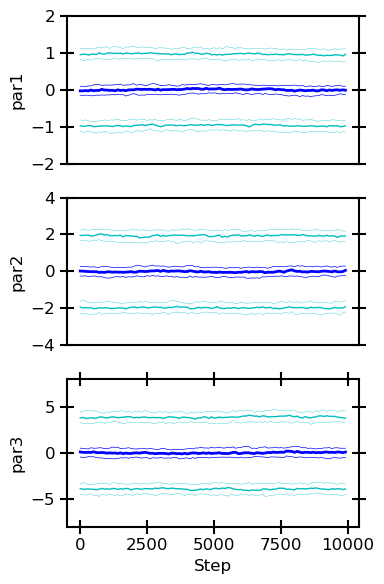

In [108]:
# Using emcee, corner, and dynesty
fitter.fit(nwalkersperdim=30, nsteps=11000, nburnin=1000,
           savechain='chain.npy')
print('best:', fitter.popt)
print('lower percentile:', fitter.plow)
print('50 percentile:', fitter.pmid)
print('higher percentile:', fitter.phigh)
fitter.getDNSevidence()
print('evidence:', fitter.evidence)
fitter.plotcorner(show=True, savefig='corner.png',
                  labels=['par1', 'par2', 'par3'],
                  cornerrange=[[-4, 4], [-8, 8], [-16, 16]])
fitter.plotchain(show=True, savefig='chain.png',
                 labels=['par1', 'par2', 'par3'],
                 ylim=[[-2, 2], [-4, 4], [-8, 8]])

best: [0. 0. 0.]
lower percentile: [-1. -2. -4.]
50th percentile: [0. 0. 0.]
higher percentile: [1. 2. 4.]
evidence: 0.015477376407909737


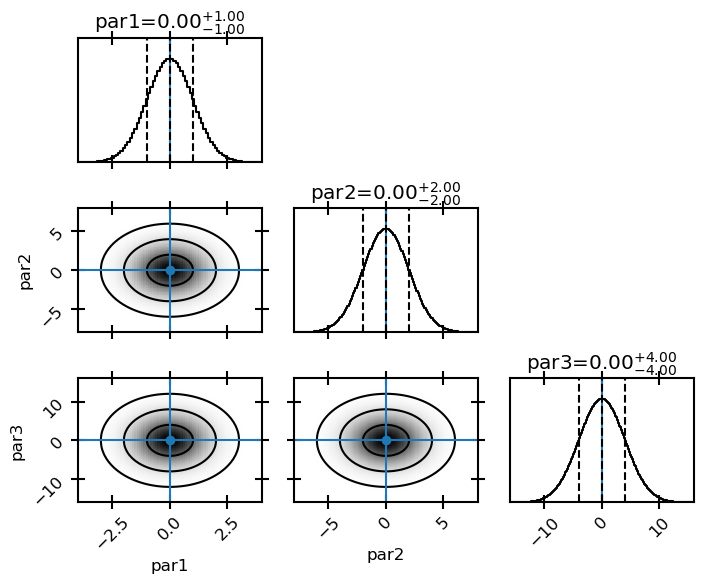

In [110]:
# Calculating logl on a parameter grid
fitter.posteriorongrid(ngrid=[101, 201, 401])
print('best:', fitter.popt)
print('lower percentile:', fitter.plow)
print('50th percentile:', fitter.pmid)
print('higher percentile:', fitter.phigh)
print('evidence:', fitter.evidence)
fitter.plotongrid(show=True, savefig='grid.png',
                  labels=['par1', 'par2', 'par3'],
                  cornerrange=[[-4, 4], [-8, 8], [-16, 16]])